<a href="https://colab.research.google.com/github/ramyasree012/Crypto-Price-Prediction-using-gradient-descent-linear-regression/blob/main/CryptoPricePrediction_using_linreg_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ETH.csv to ETH (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['ETH.csv']))
df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622
...,...,...,...,...,...,...,...,...
34492,1462813200,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213
34493,1462809600,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450
34494,1462806000,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567
34495,1462802400,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075


In [ ]:
predict_for_days = 10
df['Predicted Value'] = df[['Close']].shift(-predict_for_days) #new column named 'Predicted Value' is created
df.head(10)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Predicted Value
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125,157.12
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299,156.57
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279,156.46
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131,157.45
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622,157.69
5,1586977200000,2020-04-15 19:00:00,ETHUSD,157.78,157.84,157.10,157.10,329.356201,159.05
6,1586973600000,2020-04-15 18:00:00,ETHUSD,157.48,158.20,157.48,157.78,520.137463,158.77
7,1586970000000,2020-04-15 17:00:00,ETHUSD,157.12,157.78,156.90,157.48,156.552221,159.84
8,1586966400000,2020-04-15 16:00:00,ETHUSD,155.81,157.52,155.74,157.12,430.083035,160.21
9,1586962800000,2020-04-15 15:00:00,ETHUSD,157.12,157.15,155.81,155.81,303.839541,160.91


In [ ]:
df.tail(11)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Predicted Value
34486,1462834800,2016-05-09 23:00:00,ETHUSD,9.36,9.98,9.36,9.36,25.029058,9.55
34487,1462831200,2016-05-09 22:00:00,ETHUSD,9.94,9.94,9.36,9.36,25.000000,NaN
34488,1462827600,2016-05-09 21:00:00,ETHUSD,9.97,9.97,9.94,9.94,109.177062,NaN
34489,1462824000,2016-05-09 20:00:00,ETHUSD,9.99,9.99,9.97,9.97,10.000000,NaN
34490,1462820400,2016-05-09 19:00:00,ETHUSD,9.36,9.99,9.36,9.99,49.500000,NaN
34491,1462816800,2016-05-09 18:00:00,ETHUSD,9.49,9.49,9.36,9.36,52.954200,NaN
34492,1462813200,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213,NaN
34493,1462809600,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450,NaN
34494,1462806000,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567,NaN
34495,1462802400,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075,NaN


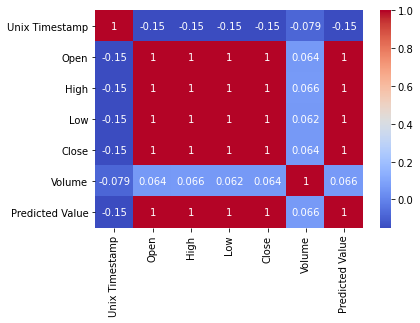

In [ ]:
sns.heatmap(df.corr(), annot = True,cmap= 'coolwarm')

In [ ]:
#create independent dataset (x)
x = np.array(df[['Close']]) 
size = len(x);
print(size)
x = x[:size-predict_for_days]
y = np.array(df[['Predicted Value']]) 
#y= df['Predicted Value'].values
y= y[:size-predict_for_days]
print(x)
print(y)

34497
[[150.39]
 [152.94]
 [155.81]
 ...
 [  9.36]
 [  9.36]
 [  9.36]]
[[157.12]
 [156.57]
 [156.46]
 ...
 [  9.99]
 [ 10.  ]
 [  9.55]]


In [ ]:
x_train_set = x[:27000]
x_test_set = x[27000:]
y_train_set = y[:27000]
y_test_set = y[27000:]

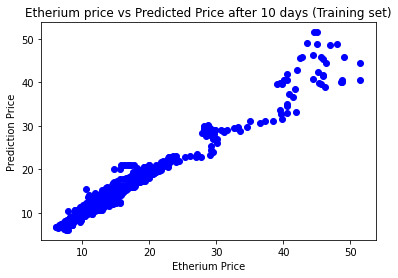

In [ ]:
plt.scatter(x_test_set, y_test_set, color = "blue")
plt.title("Etherium price vs Predicted Price after 10 days (Training set)")
plt.xlabel("Etherium Price")
plt.ylabel("Prediction Price")
plt.show()

In [ ]:
 
# Building the model
m = 0
c = 0
 
L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
 
n = len(x_train_set) # Number of elements in X
print(n)
# Performing Gradient Descent 
for k in range(epochs):
  for i in range(n): 
      Y_pred = m*x_train_set[i] + c  # The current predicted value of Y
      D_m = (-2/n) * sum(x_train_set[i] * (y_train_set[i] - Y_pred))  # Derivative wrt m
      D_c = (-2/n) * sum(y_train_set[i] - Y_pred)  # Derivative wrt c
      m = m - L * D_m  # Update m
      c = c - L * D_c  # Update c
    
print (m, c)

27000
0.9951170600596849 0.005261243018655917


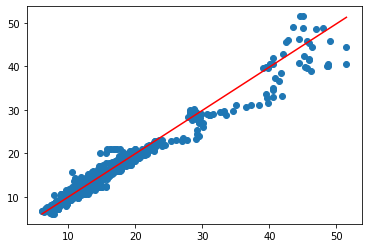

In [ ]:
# Making predictions
Y_pred = m* x_test_set + c

plt.scatter( x_test_set,  y_test_set) 
plt.plot([min( x_test_set), max( x_test_set)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [ ]:
sst=0;
ssr=0;
y_mean = np.mean(y_test_set)
n = len(x_test_set)
for i in range(n):
  sst += (y_test_set[i]-y_mean)**2;
  ssr += (y_test_set[i]-Y_pred[i])**2
rms = 1-ssr/sst
print(rms)

[0.96894102]
